[[ 0.09028869]
 [-0.19880285]
 [-0.19759595]
 [-0.18006704]
 [ 0.05003299]] [[-0.00839392]]
142 108


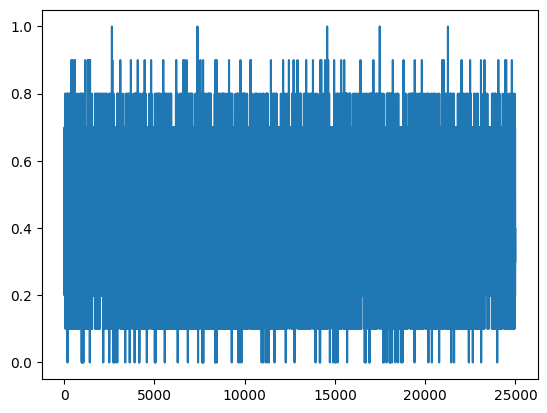

In [4]:
# Textbook: Principles and Practices of Machine Learning
# Alcohol dataset
# Author: Zhe Chen (ml_iot@163.com), 2021
import pandas
import numpy as np
import matplotlib.pyplot as plt
# load dataset
df = pandas.read_csv(r'E:\Study\Python\the_fourth_course\alcohol_dataset.csv')
data = np.array(df)
learn_rate=0.1
iteration=1000
m_all=np.shape(data)[0]
m_train=250
m_test=m_all-m_train
d=np.shape(data)[1] - 1
eopochs=1000
batch=20
#特征缩放
'''
x_mean=np.mean(data[:,:d],axis=0)
x_std=np.std(data[:,:d],axis=0,ddof=0)
data[:,:d]=(data[:,:d]-x_mean)/x_std'''
train_set=data[:m_train,:]
#划分测试集和训练集
rng=np.random.default_rng(1)
rng.shuffle(data,axis=0)
x_train=data[:m_train,:d].T
x_test=data[m_train:,:d].T
y_train=data[:m_train,d].reshape(1,-1)
y_test=data[m_train:,d].reshape(1,-1)

#训练参数
w=np.zeros((1,d)).reshape(-1,1)
b=0
cost_saved=[]
#训练
for j in range(0,eopochs):
    rng.shuffle(train_set)
    for i in range(0,m_train,batch):
        batch=min([m_train-i,batch])
        x=train_set[i:i+batch,:d].T
        y=train_set[i:i+batch,d].reshape(1,-1)
        y_hat=np.exp(np.dot(w.T,x)+b)/(1+np.exp(np.dot(w.T,x)+b))
        e=y_hat-y
        w=w-2*learn_rate*np.dot(x,(y_hat*(1-y_hat)*e).T)/batch
        b=b-2*learn_rate*np.dot((y_hat*(1-y_hat)),e.T)/batch
        cost=np.dot(e,e.T)/batch
        cost_saved.append(cost.item(0))
        
y_hat=np.exp(np.dot(w.T,x_train+b)/(1+np.exp(np.dot(w.T,x_train)+b)))
y_hat=np.squeeze(y_hat)
y_train=np.squeeze(y_train)
true_number=0
false_number=0
print(w,b)
for i in range(m_train):
    if y_hat[i]>=0.5 and y_train[i]==1 or y_hat[i]<0.5 and y_train[i]==0:
        true_number+=1
    else:false_number+=1
print(true_number,false_number)


plt.plot(range(1,len(cost_saved)+1),cost_saved)
plt.show()